**Project ini digunakan dengan menganalisis data pertumbuhan COVID-19 yang dan memvisualisasikannya dalam bentuk grafik mengenai keadaan COVID-19 saat ini di Indonesia**

> **Data yang diambil langsung dari website covid19.go.id dengan menggunakan API
sehingga teknik yang digunakn adalah, mengambil data dari API, mempersiapkan data, analisis, dan memvisualisasikan**

In [ ]:
melawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(melawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


In [ ]:
#mengakses API untuk mambil data dari website covid
#jika respon code 200 berarti sukses sdgkan 500 berrti ditolak
import requests
respon = requests.get('https://data.covid19.go.id/public/api/update.json')
print(respon)

<Response [200]>


In [ ]:
print(respon.headers)

{'Server': 'nginx', 'Date': 'Fri, 08 Jan 2021 17:12:57 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Fri, 08 Jan 2021 17:08:32 GMT', 'ETag': 'W/"5ff89190-1d4a8"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [ ]:
covid_id_raw = respon.json()
covid_id_raw

{'data': {'id': 1,
  'jumlah_odp': 69121,
  'jumlah_pdp': 0,
  'total_spesimen': 7779926,
  'total_spesimen_negatif': 4385073},
 'update': {'harian': [{'doc_count': 1,
    'jumlah_dirawat': {'value': 2},
    'jumlah_dirawat_kum': {'value': 2},
    'jumlah_meninggal': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh': {'value': 0},
    'jumlah_sembuh_kum': {'value': 0},
    'key': 1583107200000,
    'key_as_string': '2020-03-02T00:00:00.000Z'},
   {'doc_count': 1,
    'jumlah_dirawat': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2},
    'jumlah_meninggal': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh': {'value': 0},
    'jumlah_sembuh_kum': {'value': 0},
    'key': 1583193600000,
    'key_as_string': '2020-03-03T00:00:00.000Z'},
   {'doc_count': 1,
    'jumlah_dirawat': {'valu

**Analisis Data**

In [ ]:
print('Length of cov_id_raw : %d.' %len(covid_id_raw))
print('Komponen cov_id_raw : %s.' %covid_id_raw.keys())
covid_id_update = covid_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


In [ ]:
print('Tanggal pembaharuan data penambahan kasus   :', covid_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh   :', covid_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal   :',covid_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', covid_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini   :', covid_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-01-08
Jumlah penambahan kasus sembuh   : 7446
Jumlah penambahan kasus meninggal   : 233
Jumlah total kasus positif hingga saat ini   : 808340
Jumlah total kasus meninggal hingga saat ini   : 23753


**Mencoba untuk menganalisis salah satu provinsi di Indonesia, misalnya Jawa Barat**

In [ ]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
jabar_id_raw = resp_jabar.json()
jabar_id_raw

{'data': {'kasus': {'gejala': {'current_data': 587,
    'list_data': [{'doc_count': 68.14310051107326, 'key': 'BATUK'},
     {'doc_count': 44.63373083475298, 'key': 'RIWAYAT DEMAM'},
     {'doc_count': 43.100511073253834, 'key': 'PILEK'},
     {'doc_count': 39.3526405451448, 'key': 'DEMAM'},
     {'doc_count': 31.175468483816015, 'key': 'SESAK NAPAS'},
     {'doc_count': 25.04258943781942, 'key': 'SAKIT TENGGOROKAN'},
     {'doc_count': 23.509369676320272, 'key': 'LEMAS'},
     {'doc_count': 21.12436115843271, 'key': 'SAKIT KEPALA'},
     {'doc_count': 16.524701873935264, 'key': 'KERAM OTOT'},
     {'doc_count': 13.969335604770016, 'key': 'MUAL'},
     {'doc_count': 7.495741056218058, 'key': 'SAKIT PERUT'},
     {'doc_count': 5.281090289608177, 'key': 'DIARE'},
     {'doc_count': 5.281090289608177, 'key': 'MENGGIGIL'}],
    'missing_data': 99.36572768431175},
   'jenis_kelamin': {'current_data': 91008,
    'list_data': [{'doc_count': 50.04175457102672, 'key': 'LAKI-LAKI'},
     {'doc_c

In [ ]:
print("Nama elemen elemen utama: ", jabar_id_raw.keys())

Nama elemen elemen utama:  dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [ ]:
print("Jumlah total kasus Covid di Jawa Barat: ", jabar_id_raw['kasus_total'])
print("Persentase kematian akibat Covid: ", jabar_id_raw['meninggal_persen'])
print("Persentase kesembuhan dari Covid: ", jabar_id_raw['sembuh_persen'])

Jumlah total kasus Covid di Jawa Barat:  92547
Persentase kematian akibat Covid:  1.2977189968340412
Persentase kesembuhan dari Covid:  85.06920807805763


In [ ]:
import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(jabar_id_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       312 non-null    int64
 1   KASUS                         312 non-null    int64
 2   MENINGGAL                     312 non-null    int64
 3   SEMBUH                        312 non-null    int64
 4   DIRAWAT_OR_ISOLASI            312 non-null    int64
 5   AKUMULASI_KASUS               312 non-null    int64
 6   AKUMULASI_SEMBUH              312 non-null    int64
 7   AKUMULASI_MENINGGAL           312 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  312 non-null    int64
dtypes: int64(9)
memory usage: 22.1 KB
Info cov_jabar:
 None


In [ ]:
print('\nDua Puluh data teratas cov_jabar:\n',cov_jabar.head(20))


Dua Puluh data teratas cov_jabar:
           tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0   1583107200000      3  ...                    0                             3
1   1583193600000      1  ...                    1                             3
2   1583280000000      1  ...                    1                             4
3   1583366400000      1  ...                    1                             5
4   1583452800000      1  ...                    1                             6
5   1583539200000      0  ...                    1                             6
6   1583625600000      0  ...                    1                             6
7   1583712000000      0  ...                    1                             6
8   1583798400000      0  ...                    1                             6
9   1583884800000      0  ...                    2                             5
10  1583971200000      1  ...                    2                       

**Merapikan data**

In [ ]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


<Figure size 432x288 with 0 Axes>

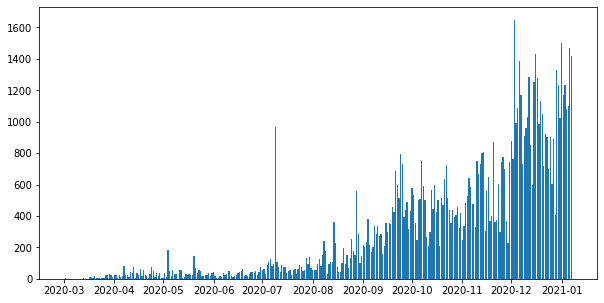

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax=plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus baru')
plt.show()

<Figure size 432x288 with 0 Axes>

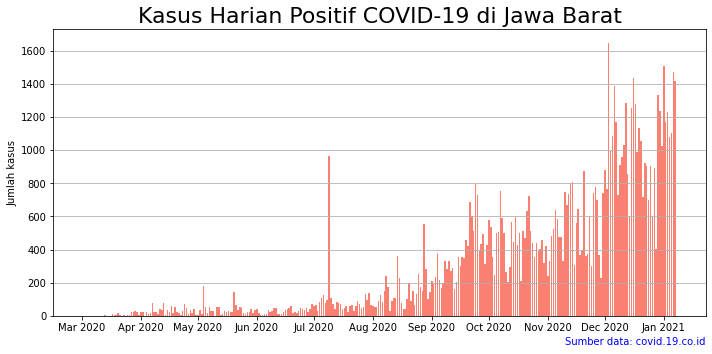

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus baru', color='salmon')
ax.set_title('Kasus Harian Positif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

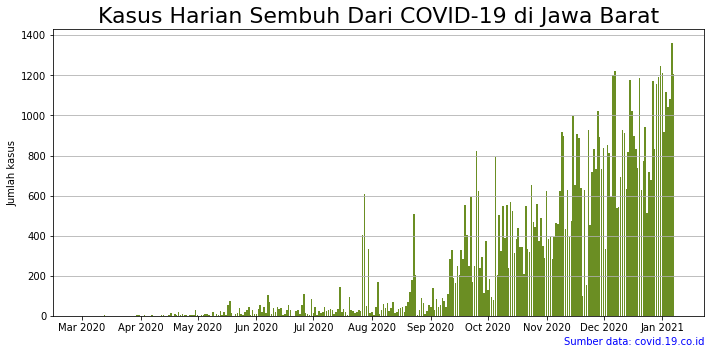

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

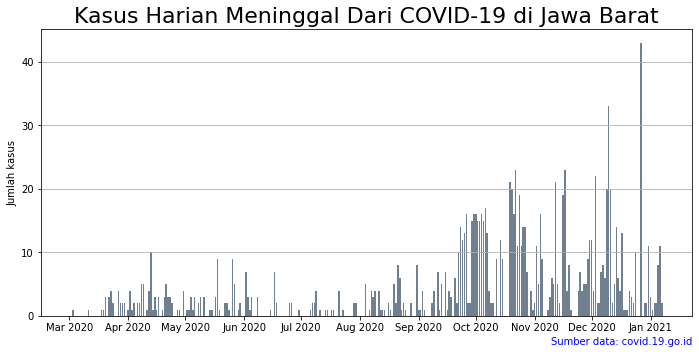

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus baru': 'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())


Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     45 non-null     int64
 1   pekan_ke  45 non-null     int64
 2   jumlah    45 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None


In [ ]:
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())


Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       7
1   2020        11       5
2   2020        12      52
3   2020        13     104
4   2020        14     122


In [ ]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     122               104       False
5   2020        15     235               122       False
6   2020        16     277               235       False
7   2020        17     216               277        True
8   2020        18     156               216        True
9   2020        19     367               156       False


<Figure size 432x288 with 0 Axes>

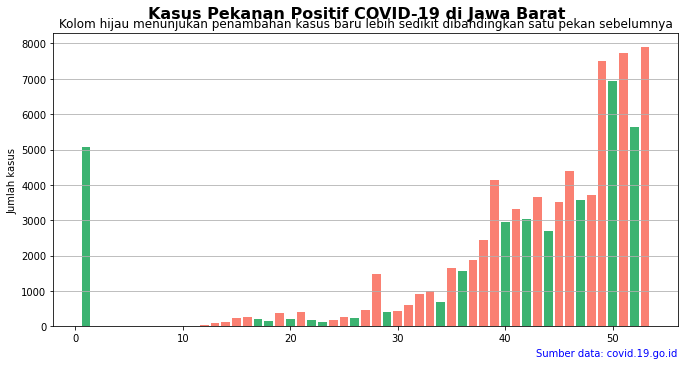

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=12)
ax.set_xlabel('')													
ax.set_ylabel('Jumlah kasus')										
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha ='right', transform=ax.transAxes)  
plt.grid(axis='y')
plt.tight_layout()														
plt.show()		

**Melihat berapa kasus yang masih aktif saat ini(sedang dalam perawatan/isolasi), akumulasi sembuh dan akumulasi meninggal**

In [ ]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
307,2021-01-03,12281,74019,1173
308,2021-01-04,12314,75063,1175
309,2021-01-05,12323,76146,1183
310,2021-01-06,12419,77509,1194
311,2021-01-07,12625,78717,1196


<Figure size 432x288 with 0 Axes>

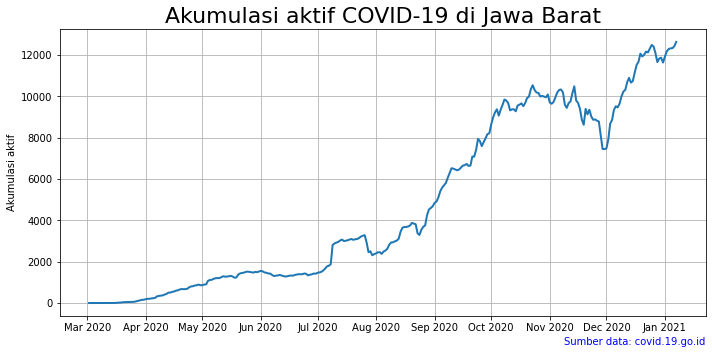

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

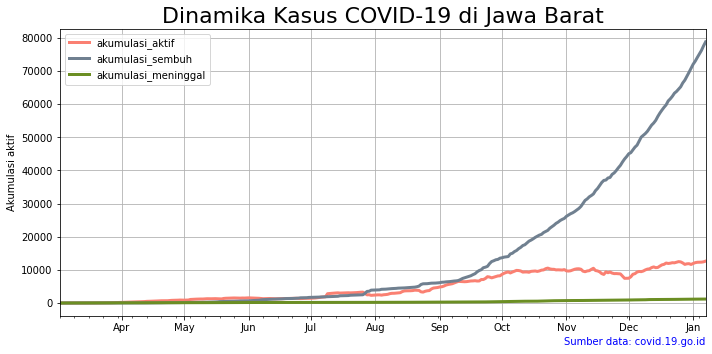

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])
ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat', fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()